# Applying Autoencoders to Methlyation data with Vanilla Architecture (5000-500-100-500-5000)

In [3]:
## Removing nan
import numpy as np 
import pandas as pd

pancan_numpy = pancaner_df.to_numpy()
print(pancaner_df.isnull().sum().sum())
col_mean = np.nanmean(pancan_numpy, axis=0)
#Find indices that you need to replace
inds = np.where(np.isnan(pancan_numpy))
#Place column means in the indices. Align the arrays using take
pancan_numpy[inds] = np.take(col_mean, inds[1])

pancancer_meth_df = pd.DataFrame(pancan_numpy,columns = pancaner_df.columns, index = pancaner_df.index)
pancancer_meth_df.isnull().sum().sum()

4119767


0

In [3]:
import joblib
import pandas as pd

meth_df_path =  "pancancer_meth_chr_nonna_fillnamean.pkl"
pancancer_meth_list = joblib.load(meth_df_path)
len(pancancer_meth_list)

23

In [6]:
pancancer_meth_df = pd.concat(pancancer_meth_list, axis=1)

In [8]:
# import joblib
# output_path = r"Y:\qiu-lab\Bridget\data\meth\meth_ALLsamp_notnacpgs_raw_fillnamean.pkl"
# joblib.dump(pancancer_meth_df, output_path)

['Y:\\qiu-lab\\Bridget\\data\\meth\\meth_ALLsamp_notnacpgs_raw_fillnamean.pkl']

In [2]:
meth_df_path = r"Y:\qiu-lab\Bridget\data\meth\meth_ALLsamp_notnacpgs_raw_fillnamean.pkl"
import joblib
pancancer_meth_df = joblib.load(meth_df_path)
pancancer_meth_df.shape

### 4. 5000 Most Variable Genes using Mean Absolute Deviation

In [10]:
pancancer_meth_df.shape

(9756, 393174)

In [11]:
most_variable_genes = pancancer_meth_df.mad(axis = 0).nlargest(5000, keep='all').index.values.tolist()
#Subseting the genes from mvg_v3_df that are on the most_variable_genes list
mvg_df = pancancer_meth_df[most_variable_genes]
mvg_df.shape

(9756, 5030)

In [13]:
# import pandas as pd
# mvg_df.to_csv("5000_mvg_meth.csv.gz", compression="gzip")
# # mvg_df = pd.read_csv("5000_mvg_meth.csv.gz", index_col=0, compression="gzip") 
# # mvg_df.shape

In [17]:

patient_metadata = pd.read_csv(r"C:\Users\ssrikrishnan6\ae_integration\info_all_ex.txt", sep = "\t")
patient_metadata

,cases.0.samples.0.days_to_collection,cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id,cases.0.samples.0.sample_type,file_name,cases.0.samples.0.submitter_id,cases.0.project.project_id,id,cases.0.samples.0.updated_datetime,cases.0.submitter_id,cases.0.demographic.updated_datetime
0,1228.0,TCGA-NC-A5HI-01A-11R-A26W-07,Primary Tumor,38fb101c-4fa7-475b-bafb-43e4df784977.FPKM-UQ.t...,TCGA-NC-A5HI-01A,TCGA-LUSC,939c91df-25ac-42aa-aac0-9c8eb4b05f66,2018-09-06T16:31:22.449726-05:00,TCGA-NC-A5HI,2018-09-06T16:31:22.449726-05:00
1,NaN,TCGA-68-8251-01A-11R-2296-07,Primary Tumor,db2ba932-0f99-4e43-ab09-355bed4651e7.FPKM-UQ.t...,TCGA-68-8251-01A,TCGA-LUSC,99eb497f-1273-42a3-bcc6-ade2e2157fda,2018-09-06T16:31:22.449726-05:00,TCGA-68-8251,2018-09-06T16:31:22.449726-05:00
2,161.0,TCGA-98-A53A-01A-11R-A262-07,Primary Tumor,23b10ac4-abaa-44e3-81b1-e2e7f7149e3c.FPKM-UQ.t...,TCGA-98-A53A-01A,TCGA-LUSC,45d9eeca-7c55-4510-87d0-f80a31e223a8,2018-09-06T16:31:22.449726-05:00,TCGA-98-A53A,2018-09-06T16:31:22.449726-05:00
3,NaN,TCGA-39-5029-01A-01R-1443-07,Primary Tumor,0b89acda-ea9e-4a21-83f8-e3195f4395e9.FPKM-UQ.t...,TCGA-39-5029-01A,TCGA-LUSC,49c1b0a5-50a2-443a-965c-f3947e471941,2018-09-06T16:31:22.449726-05:00,TCGA-39-5029,2018-09-06T16:31:22.449726-05:00
4,NaN,TCGA-22-5474-01A-01R-1635-07,Primary Tumor,2fec727f-b73d-4ae0-8b3c-5e85483e39d8.FPKM-UQ.t...,TCGA-22-5474-01A,TCGA-LUSC,4869bb7b-3e26-400e-8064-582b9d8abbf7,2018-09-06T16:31:22.449726-05:00,TCGA-22-5474,2018-09-06T16:31:22.449726-05:00
...,...,...,...,...,...,...,...,...,...,...
11088,755.0,TCGA-YL-A9WL-01A-11R-A41O-07,Primary Tumor,b37bb5d7-a62a-4fac-a9e2-3e5af5b820dd.FPKM-UQ.t...,TCGA-YL-A9WL-01A,TCGA-PRAD,cb7a8e5c-4a6f-4f70-9f47-8d39d629a84c,2018-09-06T23:26:21.566227-05:00,TCGA-YL-A9WL,2018-09-06T23:26:21.566227-05:00
11089,3586.0,TCGA-KK-A5A1-01A-11R-A29R-07,Primary Tumor,dc2d0d63-4b69-42ec-948f-81ea70f3e72a.FPKM-UQ.t...,TCGA-KK-A5A1-01A,TCGA-PRAD,b79ad979-3912-4384-a9aa-56b4b46a2a8a,2018-09-06T23:26:21.566227-05:00,TCGA-KK-A5A1,2018-09-06T23:26:21.566227-05:00
11090,239.0,TCGA-HU-A4H6-01A-11R-A251-31,Primary Tumor,60d19fd5-f7dd-4421-b03d-414b31c46daa.FPKM-UQ.t...,TCGA-HU-A4H6-01A,TCGA-STAD,ff5d051f-c3af-4531-8ed7-1277d8def50d,2018-09-06T18:42:58.220092-05:00,TCGA-HU-A4H6,2018-09-06T18:42:58.220092-05:00
11091,NaN,TCGA-BR-8291-01A-11R-2343-13,Primary Tumor,aeffc030-7e5a-478d-bb80-18c25ca041ae.FPKM-UQ.t...,TCGA-BR-8291-01A,TCGA-STAD,b4743067-5bed-47a7-8dc3-5377c1a27971,2018-09-06T18:42:58.220092-05:00,TCGA-BR-8291,2018-09-06T18:42:58.220092-05:00


In [22]:
#Parsing the index to extract TCGA Barcode
new_indices = []
for index in mvg_df.index:
    new_indices.append(index[3])
mvf_df = mvg_df.copy()
mvf_df.index = new_indices

In [24]:
# mvf_df.head()
joblib.dump(mvf_df, "meth_5000_mvf.pkl")

['meth_5000_mvf.pkl']

In [23]:
mvf_df.head()

,rs798149,rs5931272,rs5987737,rs1416770,rs2521373,rs6626309,rs5936512,cg27260772,cg01263942,cg13294849,...,cg03007522,cg12186771,cg25626375,cg01909856,cg13812927,cg13829680,cg01759889,cg09196081,cg09978401,cg25656978
TCGA-OR-A5J4-01A-11D-A29J-05,0.505859,0.978516,0.018387,0.975098,0.323975,0.496094,0.972168,0.330322,0.900391,0.170288,...,0.909180,0.485352,0.094604,0.862793,0.455078,0.254639,0.687500,0.044525,0.441650,0.668457
TCGA-OR-A5KO-01A-11D-A29J-05,0.971680,0.013649,0.488037,0.972656,0.432129,0.965332,0.023178,0.040894,0.941895,0.936523,...,0.928223,0.891113,0.595215,0.869629,0.928223,0.960449,0.580566,0.512695,0.642090,0.491699
TCGA-OR-A5J9-01A-11D-A29J-05,0.973145,0.183228,0.041687,0.265381,0.837402,0.927246,0.869629,0.146606,0.927734,0.107239,...,0.699707,0.862305,0.925781,0.836914,0.928223,0.724609,0.192627,0.093262,0.296387,0.347168
TCGA-OR-A5K6-01A-11D-A29J-05,0.399170,0.012283,0.476807,0.021210,0.503906,0.030930,0.023209,0.215454,0.957520,0.037262,...,0.053711,0.603027,0.179321,0.894043,0.835938,0.502441,0.615723,0.543457,0.644043,0.667480
TCGA-OR-A5JJ-01A-11D-A29J-05,0.975586,0.012909,0.030594,0.967773,0.944336,0.054291,0.034821,0.049286,0.944336,0.111938,...,0.879395,0.880859,0.087463,0.836426,0.903320,0.170654,0.017212,0.040405,0.018250,0.021347


### 5. Building a Vanilla Autoencoder

In [6]:
import os
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from keras import backend as K #For explicitly \adjusting the learning rate


In [7]:
X_train, X_val = train_test_split(mvg_df, test_size=0.2, random_state = seed(77))

In [8]:
ncol = mvg_df.shape[1] #Input Feature Number
encoding_dim = 100 #Nodes in Bottleneck layer

#Network configuration
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(500, activation = 'relu')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)

# Decoder Layers
decoded1 = Dense(500, activation = 'relu')(encoded2)
decoded2 = Dense(ncol, activation = 'sigmoid')(decoded1) #Applying sigmoid activation on the output layer ensure input also belongs to (0,1)

In [14]:
# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded2)

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')#Should try Pseudo-Heuber Loss, Binary Crossentropy 
#adam - stochastic gradient descent algorithm
K.set_value(autoencoder.optimizer.learning_rate, 0.01) #Setting the learning rate to 10^-3

In [15]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense (Dense)               (None, 500)               2500500   
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 500)               50500     
                                                                 
 dense_3 (Dense)             (None, 5000)              2505000   
                                                                 
Total params: 5,106,100
Trainable params: 5,106,100
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = autoencoder.fit(X_train, X_train, epochs = 200, batch_size = 128, shuffle = False, verbose = 1, validation_data = (X_val, X_val))

Epoch 1/200
61/61 [==============================] - 3s 46ms/step - loss: 0.0547 - val_loss: 0.0343
Epoch 2/200
61/61 [==============================] - 2s 33ms/step - loss: 0.0326 - val_loss: 0.0310
Epoch 3/200
61/61 [==============================] - 2s 33ms/step - loss: 0.0303 - val_loss: 0.0291
Epoch 4/200
61/61 [==============================] - 2s 33ms/step - loss: 0.0290 - val_loss: 0.0288
Epoch 5/200
61/61 [==============================] - 2s 33ms/step - loss: 0.0288 - val_loss: 0.0297
Epoch 6/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0284 - val_loss: 0.0288
Epoch 7/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0287 - val_loss: 0.0299
Epoch 8/200
61/61 [==============================] - 2s 33ms/step - loss: 0.0282 - val_loss: 0.0285
Epoch 9/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0274 - val_loss: 0.0280
Epoch 10/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0274 - val_loss: 0.0281

61/61 [==============================] - 2s 34ms/step - loss: 0.0285 - val_loss: 0.0302
Epoch 163/200
61/61 [==============================] - 2s 33ms/step - loss: 0.0274 - val_loss: 0.0286
Epoch 164/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0277 - val_loss: 0.0293
Epoch 165/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0277 - val_loss: 0.0288
Epoch 166/200
61/61 [==============================] - 2s 33ms/step - loss: 0.0273 - val_loss: 0.0289
Epoch 167/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0273 - val_loss: 0.0291
Epoch 168/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0273 - val_loss: 0.0287
Epoch 169/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0273 - val_loss: 0.0282
Epoch 170/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0265 - val_loss: 0.0283
Epoch 171/200
61/61 [==============================] - 2s 34ms/step - loss: 0.0261 - val_loss: 0

dict_keys(['loss', 'val_loss'])


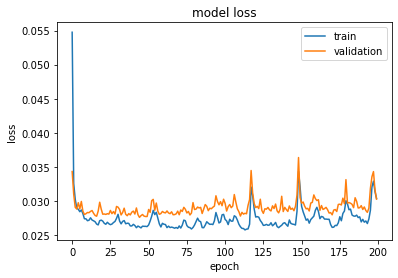

In [17]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [24]:
#Obtain the reduced data
encoder = Model(inputs = input_dim, outputs = encoded2)
encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(mvg_df), index=mvg_df.index) #Maintain Index for Mapping to cancer type 
encoded_train = encoded_train.add_prefix('feature_')
encoded_train.shape

(9756, 100)

In [25]:
#output dataset
shape_before_removing_nan = encoded_train.shape
encoded_train.replace(0, np.nan, inplace=True) #Converting all the zero's to nan to use nan command

encoded_train.dropna(how='all',axis=1, inplace=True) #Removing columns with all nan rows
encoded_train.dropna(how='all',axis=0, inplace=True) #Removing rows with all nan columns

encoded_train.replace(np.nan, 0, inplace=True) #Converting all the nan's to zero to be compatible with t-SNE

encoded_train.to_csv("Meth_AE_v0.csv", index=True)
# encoded_train = pd.read_csv("Meth_AE_v0.csv",index_col=[0,1,2,3,4])

In [26]:
shape_before_removing_nan, encoded_train.shape

((9756, 100), (9756, 46))

In [27]:
encoded_train.head()

,,,,,feature_0,feature_1,feature_2,feature_5,feature_6,feature_9,feature_10,feature_15,feature_16,feature_17,...,feature_77,feature_83,feature_84,feature_85,feature_86,feature_87,feature_89,feature_95,feature_97,feature_99
patient,sample,sample_type,aliquot,file,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J4,TCGA-OR-A5J4-01A,01A,TCGA-OR-A5J4-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\0874f4b8-5743-4b41-9b99-f02186c8b51e\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5J4-01A-11D-A29J-05.gdc_hg38_betaonly.txt,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.097318
TCGA-OR-A5KO,TCGA-OR-A5KO-01A,01A,TCGA-OR-A5KO-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\0885b557-48ca-4865-b17a-f2e1f6209b81\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5KO-01A-11D-A29J-05.gdc_hg38_betaonly.txt,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.077973
TCGA-OR-A5J9,TCGA-OR-A5J9-01A,01A,TCGA-OR-A5J9-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\09eb5b05-2794-437b-a307-5255f69c4a32\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5J9-01A-11D-A29J-05.gdc_hg38_betaonly.txt,0.0,0.0,0.0,0.0,2.629910,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.616626
TCGA-OR-A5K6,TCGA-OR-A5K6-01A,01A,TCGA-OR-A5K6-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\10ee4988-4a8f-4a0e-ae63-cc891c765fba\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5K6-01A-11D-A29J-05.gdc_hg38_betaonly.txt,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.242562
TCGA-OR-A5JJ,TCGA-OR-A5JJ-01A,01A,TCGA-OR-A5JJ-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\16ff6c63-eca7-4376-a13e-682682b74e11\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5JJ-01A-11D-A29J-05.gdc_hg38_betaonly.txt,0.0,0.0,0.0,0.0,11.816303,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.322347


### 6. Dimension Reduction and Cluster Visualization using t-SNE 


perplexity parameter can be changed based on the input datatset - dataset with larger number of variables requires larger perplexity set this value between 5 and 50 (sklearn documentation) verbose=1 displays run time messages set n_iter sufficiently high to resolve the well stabilized cluster get embeddings


In [28]:
# Perform t-SNE on AE encoded_features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=20, learning_rate=300, n_iter=400, verbose=1)
#TSNE(n_components=2, perplexity=105, n_iter=1000, verbose=1).fit_transform(encoded_train)
tsne_out = tsne.fit_transform(encoded_train)
tsne_components = pd.DataFrame(tsne_out, index = encoded_train.index ) #Maintain Index


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 9756 samples in 0.001s...
[t-SNE] Computed neighbors for 9756 samples in 4.522s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9756
[t-SNE] Computed conditional probabilities for sample 2000 / 9756
[t-SNE] Computed conditional probabilities for sample 3000 / 9756
[t-SNE] Computed conditional probabilities for sample 4000 / 9756
[t-SNE] Computed conditional probabilities for sample 5000 / 9756
[t-SNE] Computed conditional probabilities for sample 6000 / 9756
[t-SNE] Computed conditional probabilities for sample 7000 / 9756
[t-SNE] Computed conditional probabilities for sample 8000 / 9756
[t-SNE] Computed conditional probabilities for sample 9000 / 9756
[t-SNE] Computed conditional probabilities for sample 9756 / 9756
[t-SNE] Mean sigma: 3.105355


C:\Users\ssrikrishnan6\Anaconda3\envs\metalearning\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.727425
[t-SNE] KL divergence after 400 iterations: 1.758443


In [30]:
tsne_components.head()

,,,,,0,1
patient,sample,sample_type,aliquot,file,,
TCGA-OR-A5J4,TCGA-OR-A5J4-01A,01A,TCGA-OR-A5J4-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\0874f4b8-5743-4b41-9b99-f02186c8b51e\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5J4-01A-11D-A29J-05.gdc_hg38_betaonly.txt,5.235281,-22.768929
TCGA-OR-A5KO,TCGA-OR-A5KO-01A,01A,TCGA-OR-A5KO-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\0885b557-48ca-4865-b17a-f2e1f6209b81\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5KO-01A-11D-A29J-05.gdc_hg38_betaonly.txt,5.821666,-22.718452
TCGA-OR-A5J9,TCGA-OR-A5J9-01A,01A,TCGA-OR-A5J9-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\09eb5b05-2794-437b-a307-5255f69c4a32\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5J9-01A-11D-A29J-05.gdc_hg38_betaonly.txt,6.927440,-22.330357
TCGA-OR-A5K6,TCGA-OR-A5K6-01A,01A,TCGA-OR-A5K6-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\10ee4988-4a8f-4a0e-ae63-cc891c765fba\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5K6-01A-11D-A29J-05.gdc_hg38_betaonly.txt,5.498724,-22.881968
TCGA-OR-A5JJ,TCGA-OR-A5JJ-01A,01A,TCGA-OR-A5JJ-01A-11D-A29J-05,Y:\qiu-lab\Bridget\data\meth\methylation_raw\adrenocortical\16ff6c63-eca7-4376-a13e-682682b74e11\jhu-usc.edu_ACC.HumanMethylation450.1.lvl-3.TCGA-OR-A5JJ-01A-11D-A29J-05.gdc_hg38_betaonly.txt,5.834389,-22.014448


### 7. Mapping samples to cancer type


In [31]:
import pandas as pd
patient_metadata = pd.read_csv(r"C:\Users\ssrikrishnan6\ae_integration\info_all_ex.txt", sep = "\t")
patient_metadata = patient_metadata[[ 'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id','cases.0.project.project_id','cases.0.samples.0.sample_type']] #tolist()
patient_metadata.rename(columns={'cases.0.project.project_id': "cancer_type", "cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id":"tcga_id"},inplace=True)
patient_metadata.set_index("tcga_id", inplace=True)

new_patient_indices = []
for index in patient_metadata.index:
    new_patient_indices.append("-".join(index.split("-")[:-3]))
patient_metadata.index = new_patient_indices

In [32]:
#Parsing the index to extract TCGA Barcode
new_indices = []
for index in tsne_components.index:
    new_indices.append(index[1])
new_tsne_components = tsne_components.copy()
new_tsne_components.index = new_indices

#Merging based on tcga_id
grouped_tsne = pd.merge(new_tsne_components , patient_metadata['cancer_type'] , left_index=True, right_index=True)
grouped_tsne.head()
grouped_tsne.to_csv("tsne_meth_ae_v1.csv")

In [33]:
# #Merging based on tcga_id
# grouped_tsne = pd.merge(tsne_components , patient_metadata['cancer_type'] , left_index=True, right_index=True)
# grouped_tsne.head()

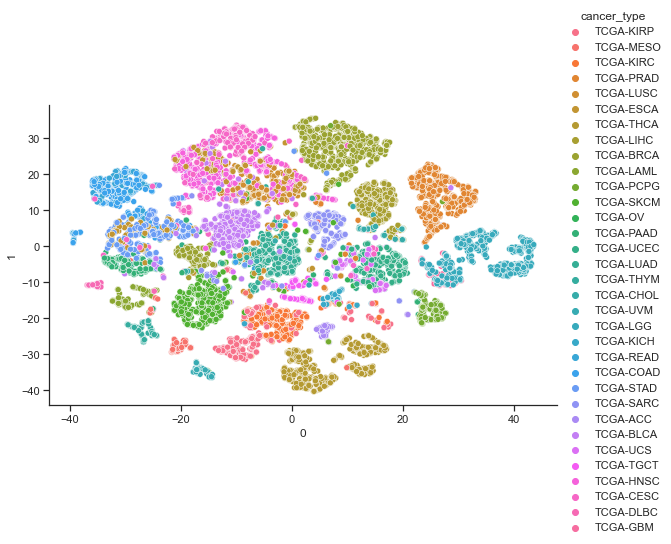

In [34]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

Relplot = A figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

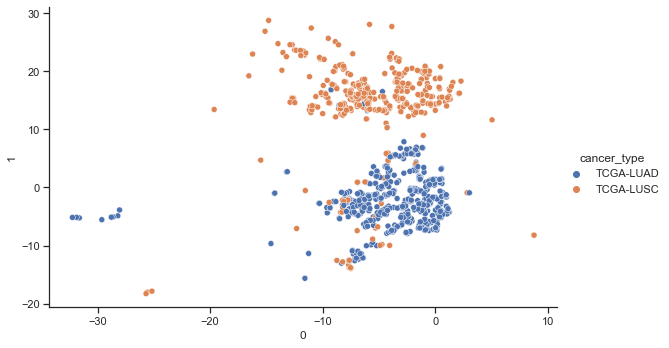

In [35]:
lung_cancer_types = ["TCGA-LUAD","TCGA-LUSC"] 
lung_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_cancer_types)]

seaborn.relplot(data=lung_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_cancer_types, aspect=1.61)
plt.show()

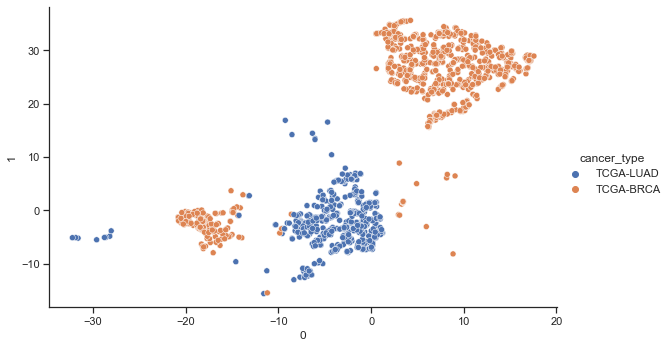

In [36]:
lung_breast_cancer_types = ["TCGA-LUAD","TCGA-BRCA"] 
lung_breast_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_breast_cancer_types)]

seaborn.relplot(data=lung_breast_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_breast_cancer_types, aspect=1.61)
plt.show()